# Chapter 06. RNN with gate
RNN is easy and simple. but it has limits: hard to understand long term dependency.  
we use LSTM or GRU later.  
those model has 'gate'. 'gate' allows model to understand long term dependency.  
we will learn 'gate', and LSTM. and how does this model can have long term memory.  

## 6.1 RNN's problem.
: no long term memory.  
because BPTT has gradient vanishing/ explosion problem.  

### 6.1.1 RNN review
RNN has horizontal structure, input xt, output ht.  
ht is 'hidden state', is stores previous information.  

### 6.1.2 gradient vanishing/explosion.
suppose   
"tom was watching TV in his room, Mary came into the room. Maty said hi to [?]"  
we want "tom" in the blank. but backpropagation takes too long way

### 6.1.3 reason for gradient vanishing/ explosion
how does tanh and MatMul changes backpropagation?  
d(tanh) = 1 - y^2  
MatMul's backpropagation is W^t (?)  
how does MatMul affect backprop?

[2.4684068094579303, 3.3357049741610365, 4.783279375373182, 6.279587332087612, 8.080776465019053, 10.251163032292936, 12.936063506609896, 16.276861327786712, 20.45482961834598, 25.688972842084684, 32.25315718048336, 40.48895641683869, 50.8244073070191, 63.79612654485427, 80.07737014308985, 100.5129892205125, 126.16331847536823, 158.35920648258823, 198.7710796761195, 249.495615421267]


c:\Users\GAILAB\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\GAILAB\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\GAILAB\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\GAILAB\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\GAILAB\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45432 (\N{HANGUL SYLLABLE NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\GAILAB\anacond

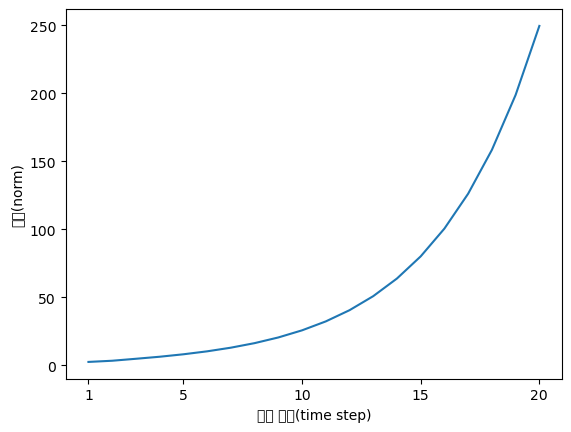

In [1]:
import rnn_gradient_graph

this is exploding gradient.

[1.2342034047289652, 0.8339262435402591, 0.5979099219216477, 0.39247420825547574, 0.2525242645318454, 0.16017442237957713, 0.10106299614538981, 0.06358148956166684, 0.03995083909833199, 0.025086887541098325, 0.015748611904532892, 0.009884999125204758, 0.006204151282595105, 0.003893806551809953, 0.002443767399386287, 0.0015337065005571365, 0.0009625497320203265, 0.0006040924319556741, 0.00037912574706291106, 0.00023793756048323344]


c:\Users\GAILAB\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\GAILAB\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\GAILAB\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\GAILAB\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\GAILAB\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45432 (\N{HANGUL SYLLABLE NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\GAILAB\anacond

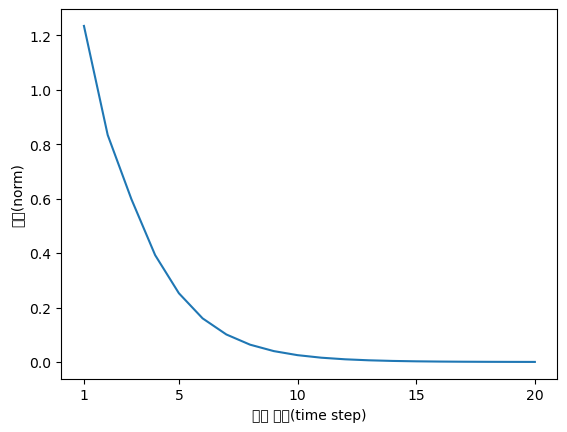

<module 'rnn_gradient_graph' from 'd:\\VScode_Local\\DeepLearningFromScratch2-main\\DeepLearningFromScratch_2\\ch06\\rnn_gradient_graph.py'>

In [9]:
import importlib

importlib.reload(rnn_gradient_graph)

this is vanishing gradient.

why does this happen? because we multiplied Wh T times.  
if Wh is scalar, whether Wh is bigger or smaller than 1 is important.  
what if Wh is matrix? in this case, eigenvalue is important.  
martix' eigenvalue indicates how sparse is the matrix' element.  
checking eigenvalue and see if it is bigger and smaller than 1. then you can predict gradients.

### 6.1.4 solution to exploding gradient 
: gradients clipping.  
g : gradient  
if g > threshold:  
g = ( threshold/|g| ) * g

In [12]:
# ch06/clip_grads.py
# common/util.py
import numpy as np

dW1 = np.random.rand(3, 3) * 10
dW2 = np.random.rand(3, 3) * 10
grads = [dW1, dW2]
max_norm = 5.0


def clip_grads(grads, max_norm):
    total_norm = 0
    for grad in grads:
        total_norm += np.sum(grad ** 2)
    total_norm = np.sqrt(total_norm)

    rate = max_norm / (total_norm + 1e-6)
    if rate < 1:
        for grad in grads:
            grad *= rate


print('before:', dW1.flatten())
clip_grads(grads, max_norm)
print('after:', dW1.flatten())


before: [2.77977507 4.54622076 2.05410345 2.01378711 5.1403506  0.87229369
 4.83585532 3.62176212 7.07686622]
after: [0.66651711 1.09006443 0.4925201  0.4828533  1.23252117 0.20915313
 1.15951119 0.86840351 1.69684679]


## 6.2 vanishing gradient and LSTM
in order to fix vanishing gradient, we need to fix foundation of RNN architecture.  
now we use core concept of this chapter, 'gate'.  

### 6.2.1 LSTM's interface
we will simplify our diagram little bit.  
RNN takes ht-1, xt, and gives ht.  
LSTM takes ct-1, ht-1, and xt, and gives ct, ht.  
i wonder what is c?
  
c is "memory cell"  
unlike x and h, c is contained in LSTM layer only.  
from other layer, c is hidden and nonointeractable.  

### 6.2.2 crafting LSTM layer
https://colah.github.io/posts/2015-08-Understanding-LSTMs/  
ct has all the memory from past.  
we improve ht by using ct. ht = tanh(ct)  
  
why the name is 'gate'?  
imagine floodgate. floodgate controls flow of water.  
LSTM's gate controls flow of data, it is more than open/closed. it can control its 'openness' (ex: 20% open)  
interesting thing is: gate also learns how much it should be opened.

### 6.2.3 output gate
output gate are o.  
o = sigma(xt*Wx + ht-1*Wh + b)  
ht is element wise multiplication between o and tanh  
terminology : Hadamard production 

### 6.2.4 forget gate
we consider "what to forget" in memory cell.  
forgeet gate(f) is quite similar to output gate.  
after f gets xt and ht-1, hadamard product of f and ct-1 gives ct.  

### 6.2.5 new memory cell
new memory cell is called g.  
g gets xt and ht-1. 
g is not the gate. its purpose is to add new memory.  
therefore, tanh is used instead of sigmoid. (tanh = -1 ~ 1. for information, sigmoid = 0 ~ 1. for gate)  
g + ct-1 makes new memory(ct)

### 6.2.6 input gate
input gate(i) decides how valuable the information is.  
ct = ct-1 + (g * i)

### 6.2.7 LSTM gradient flow
c's backpropagation only conists of + and *.  
'+' changes nothing to gradient.  
'*' in this case is hadamard product.  
every time, *'s value is different (ht). so its vanishing gradient problem is fixed.  


## 6.3 LSTM implementation
f, g, o, i they are all "Affine Transformation"  
they all take same inputs and process different matrix multiplication + bias.  
thus, we can make this into one formula.  
xt*Wx + ht-1*Wh + b  
and slice them later

In [1]:
class LSTM:
    def __init__(self, Wx, Wh, b):
        self.params = [Wx, Wh, b]
        self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]
        self.cache = None # cache stores result of forward and use it in backprop
        
    def forward(self, x, h_prev, c_prev):
        Wx, Wh, b = self.params
        N, H = h_prev.shape
        
        A = np.matmul(x, Wx) + np.matmul(h_prev, Wh) + b
        
        #slice
        f = A[:, :H]
        g = A[:, H:2*H]
        i = A[:, 2*H:3*H]
        o = A[:, 3*H:]
        
        c_next = f * c_prev + g * i
        h_next = o * np.tanh(c_next)
        
        self.cache = (x, h_prev, c_prev, i, f, g, o, c_next)
        return h_next, c_next
    
    def backward(self, dh_next, dc_next):
        Wx, Wh, b = self.params
        x, h_prev, c_prev, i, f, g, o, c_next = self.cache

        tanh_c_next = np.tanh(c_next)

        ds = dc_next + (dh_next * o) * (1 - tanh_c_next ** 2)

        dc_prev = ds * f

        di = ds * g
        df = ds * c_prev
        do = dh_next * tanh_c_next
        dg = ds * i

        di *= i * (1 - i)
        df *= f * (1 - f)
        do *= o * (1 - o)
        dg *= (1 - g ** 2)

        dA = np.hstack((df, dg, di, do))

        dWh = np.dot(h_prev.T, dA)
        dWx = np.dot(x.T, dA)
        db = dA.sum(axis=0)

        self.grads[0][...] = dWx
        self.grads[1][...] = dWh
        self.grads[2][...] = db

        dx = np.dot(dA, Wx.T)
        dh_prev = np.dot(dA, Wh.T)

        return dx, dh_prev, dc_prev

### 6.3.1 Time LSTM implementation
Time LSTM processes T amount of data at once.  
use same principle as Time RNN  
check common/time_layers.py

## 6.4 Language Model with LSTM
check : ch06/rnnlm.py  
ch06/rnlm.py is more simpler.  

now we can train with this.
check: ch06/train_rnnlm.py

Done
| 에폭 1 |  반복 1 / 1327 | 시간 0[s] | 퍼플렉서티 10001.52
| 에폭 1 |  반복 21 / 1327 | 시간 3[s] | 퍼플렉서티 2925.68
| 에폭 1 |  반복 41 / 1327 | 시간 6[s] | 퍼플렉서티 1258.91
| 에폭 1 |  반복 61 / 1327 | 시간 9[s] | 퍼플렉서티 969.60
| 에폭 1 |  반복 81 / 1327 | 시간 12[s] | 퍼플렉서티 811.35
| 에폭 1 |  반복 101 / 1327 | 시간 15[s] | 퍼플렉서티 624.50
| 에폭 1 |  반복 121 / 1327 | 시간 18[s] | 퍼플렉서티 642.72
| 에폭 1 |  반복 141 / 1327 | 시간 21[s] | 퍼플렉서티 598.03
| 에폭 1 |  반복 161 / 1327 | 시간 24[s] | 퍼플렉서티 589.83
| 에폭 1 |  반복 181 / 1327 | 시간 27[s] | 퍼플렉서티 594.29
| 에폭 1 |  반복 201 / 1327 | 시간 30[s] | 퍼플렉서티 512.40
| 에폭 1 |  반복 221 / 1327 | 시간 33[s] | 퍼플렉서티 495.33
| 에폭 1 |  반복 241 / 1327 | 시간 36[s] | 퍼플렉서티 440.17
| 에폭 1 |  반복 261 / 1327 | 시간 39[s] | 퍼플렉서티 461.11
| 에폭 1 |  반복 281 / 1327 | 시간 43[s] | 퍼플렉서티 459.06
| 에폭 1 |  반복 301 / 1327 | 시간 46[s] | 퍼플렉서티 394.51
| 에폭 1 |  반복 321 / 1327 | 시간 49[s] | 퍼플렉서티 343.70
| 에폭 1 |  반복 341 / 1327 | 시간 52[s] | 퍼플렉서티 398.78
| 에폭 1 |  반복 361 / 1327 | 시간 55[s] | 퍼플렉서티 403.24
| 에폭 1 |  반복 381 / 1327 | 시간 58[s] | 퍼플렉서티 333.29
|

c:\Users\GAILAB\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\GAILAB\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48373 (\N{HANGUL SYLLABLE BOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\GAILAB\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54140 (\N{HANGUL SYLLABLE PEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\GAILAB\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54540 (\N{HANGUL SYLLABLE PEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\GAILAB\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47113 (\N{HANGUL SYLLABLE REG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\GAILAB\ana

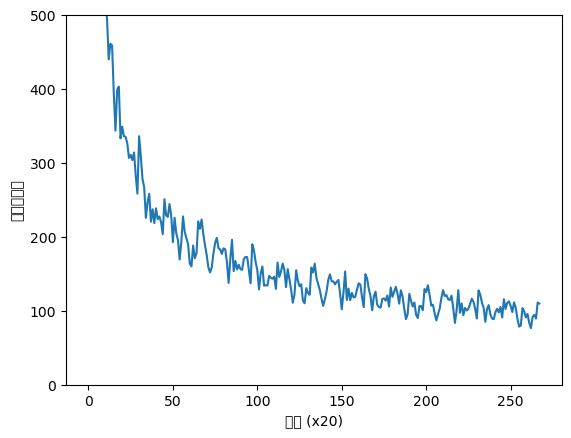

퍼플렉서티 평가 중 ...
234 / 235
테스트 퍼플렉서티:  134.7878269934403


In [2]:
import train_rnnlm

perplexity is around 135. 2017's top perplexity is around 60.  
we will improve.  

## 6.5 RNNLM improvement 
we have three points to improve our model.

### 6.5.1 multi layered LSTM
we can imagine 2, 3, or many vertical layers of LSTM. 

### 6.5.2 overfitting control by dropout
we can make model less complex.  
normalization(panelty for being too complex) is also works well.  
we use dropout by masking them. if so, where do we put this?  
horizontal is not good idea, because it blocks our memory.  
vertical is considerable.  
(recent study is working on using dropout for both direction.)

### 6.5.3 weight tying
we tie the weight of embedding and Affine layer.

### 6.5.4 improved RNNLM implementation
check: ch06/better_rnnlm.py  
check: ch06/train_better_rnnlm.py  
training takes around 5h. or even 2 days...   
we have it in BetterRnnlm.pkl


In [ ]:
# import train_better_rnnlm

In [12]:
import pickle
from better_rnnlm import BetterRnnlm

# Load the parameters from the pickle file
with open('BetterRnnlm.pkl', 'rb') as f:
    params = pickle.load(f)

# Initialize the model with the loaded parameters
print(params)

[array([[-0.013565,  0.00986 ,  0.01095 , ..., -0.03284 ,  0.03062 ,
        -0.01984 ],
       [-0.02504 , -0.001   ,  0.02383 , ..., -0.02986 ,  0.02824 ,
        -0.007706],
       [ 0.01009 ,  0.02551 ,  0.01991 , ..., -0.03976 ,  0.0474  ,
        -0.03152 ],
       ...,
       [ 0.11053 ,  0.04056 , -0.0334  , ..., -0.02448 ,  0.01082 ,
        -0.1022  ],
       [ 0.1115  ,  0.0444  , -0.00795 , ..., -0.0225  ,  0.08545 ,
        -0.02332 ],
       [ 0.03372 ,  0.0358  , -0.02992 , ..., -0.01159 ,  0.0508  ,
        -0.04672 ]], dtype=float16), array([[-0.05374 , -0.03665 , -0.0682  , ..., -0.02466 ,  0.006027,
         0.08167 ],
       [ 0.04105 , -0.05438 ,  0.04312 , ..., -0.02975 ,  0.0492  ,
         0.02827 ],
       [ 0.0407  , -0.012054,  0.07275 , ...,  0.015594, -0.08685 ,
        -0.0819  ],
       ...,
       [-0.01964 ,  0.03473 ,  0.06445 , ..., -0.00771 , -0.049   ,
        -0.063   ],
       [ 0.005035, -0.001284,  0.03296 , ..., -0.0417  ,  0.141   ,
        -0

In [4]:
import better_rnnlm

## 6.5.5 cutting edge tech
recent tech uses multi layered LSTM, Dropout, weight tying.  
but they have refined initializing, hyperparameter tuning.  

## 6.6 conclutsion
we learned RNN, gates, LSTM, and imrpoved LSTM.  
next chapter, we will learn how to generate sentence, and how machine makes one sentence to other sentence(translation)